### NYC Temp Predictions

Gabriel Richards

See more information in the Readme:
https://github.com/gjrich/datafun-07-applied/blob/main/README.md

Step 0 - install necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### Part 1- Chart a Straight Line

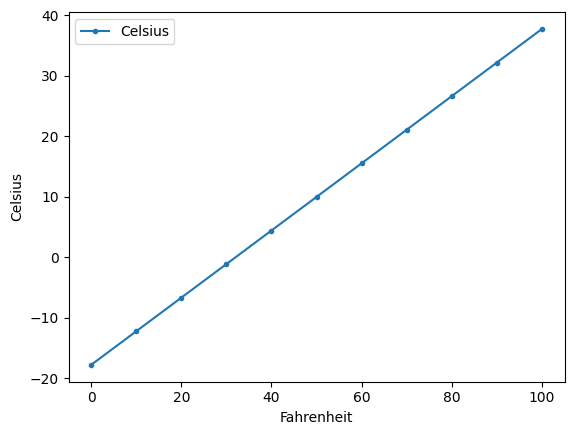

In [2]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# import pandas as pd 
# already done

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### Part 2 - Prediction

### Section 1 - Data Acquisition
Loading the Average High Temps into a DataFrame

In [3]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')



### Section 2 - Data Inspection

In [4]:
nyc_df.head()

nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Cleaning the Data

In [5]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [6]:
nyc_df.Date.dtype

dtype('int64')

In [7]:
nyc_df.Date = nyc_df.Date.floordiv(100)

nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
Calculating Basic Descriptive Statistics for the Dataset

In [8]:
pd.set_option('display.precision', 2)

nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
Forecasting Future January 

In [9]:
linear_regression = stats.linregress(x=nyc_df.Date, y=nyc_df.Temperature)

linear_regression.slope

np.float64(0.014771361132966163)

In [10]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
We can use the values above with a simple linear regression equation for a straight line to predict the ave3rage Jan temperature in NYC for a given year. Numbers below in Fahrenheit.

In [11]:
linear_regression.slope * 2019 + linear_regression.intercept

np.float64(38.51837136113297)

The predicted high temp for Jan 2019 was 38.51 degrees.

In [12]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

The predicted high temp for Jan 1890 was 36.61 degrees.

In [13]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

The predicted high temp for Jan 2024 was 38.59 degrees.

### Section 7 - Visualizations

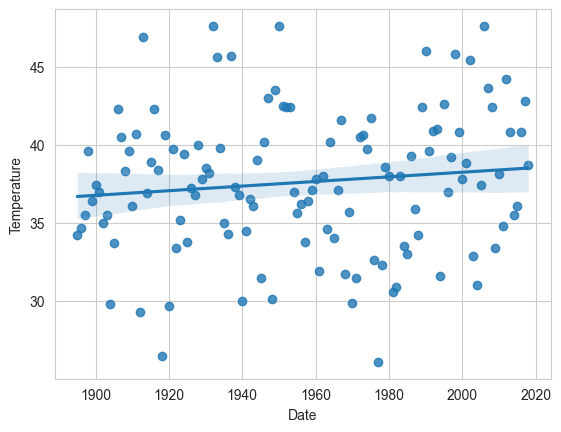

In [14]:
sns.set_style('whitegrid')
axes=sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)



(10.0, 70.0)

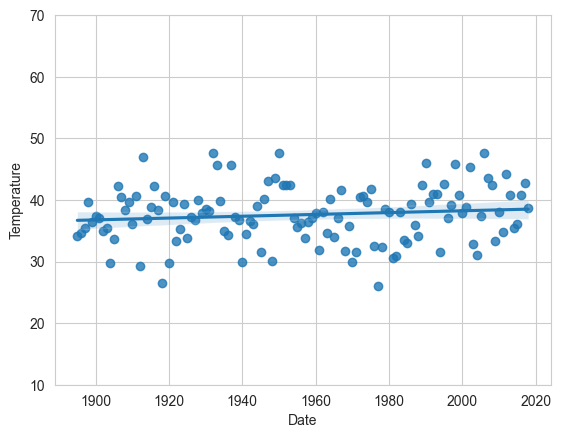

In [15]:
axes=sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)

This moves the data points to show as between 10 and 70 degrees Fahrenheit.

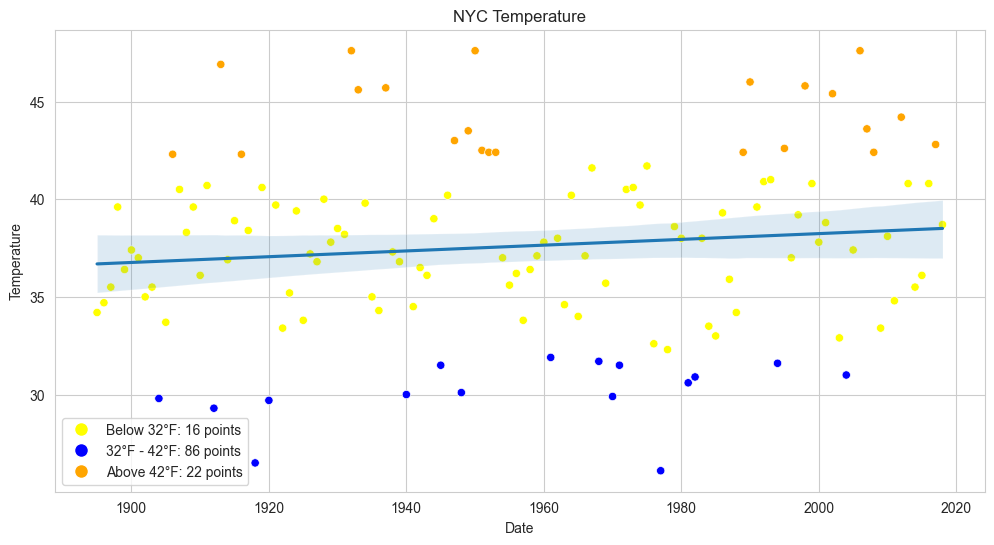

In [32]:

sns.set_style('whitegrid')

conditions = [
    (nyc_df.Temperature < 32),
    (nyc_df.Temperature >= 32) & (nyc_df.Temperature <= 42),
    (nyc_df.Temperature > 42)
]
colors = ['yellow', 'blue', 'orange']

# Create a new column in the DataFrame for colors based on conditions
nyc_df['Color'] = 'orange'  # Default color
nyc_df.loc[conditions[0], 'Color'] = colors[0]  # Blue for < 32
nyc_df.loc[conditions[1], 'Color'] = colors[1]  # Yellow for 32-42
nyc_df.loc[conditions[2], 'Color'] = colors[2]  # Orange for > 42

# Count the number of points in each category
below_32_count = nyc_df[nyc_df.Temperature < 32].shape[0]
between_32_42_count = nyc_df[(nyc_df.Temperature >= 32) & (nyc_df.Temperature <= 42)].shape[0]
above_42_count = nyc_df[nyc_df.Temperature > 42].shape[0]

# Plot using scatterplot for colored points
plt.figure(figsize=(12, 6))
axes = sns.scatterplot(x=nyc_df.Date, y=nyc_df.Temperature, hue=nyc_df.Color, palette=colors, legend=False)

sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter=False, ax=axes)

# Adding custom legend with data point counts
legend_labels = [
    f'Below 32°F: {below_32_count} points',
    f'32°F - 42°F: {between_32_42_count} points',
    f'Above 42°F: {above_42_count} points'
]
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label=legend_labels[0]),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[1]),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label=legend_labels[2])])

# Set title and labels
plt.title('NYC Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')

# Display the plot
plt.show()


The plot was further altered to show all points below 32 as blue, above 42 as orange, and everything in the center as yellow.

### Part 3 - Prediction

### Section 1 - Build the Model

In [17]:
X_train, X_test, y_train, y_test, = train_test_split(nyc_df.Date.values.reshape(-1,1), nyc_df.Temperature.values, random_state=11)

In [18]:
X_train.shape

(93, 1)

In [19]:
X_test.shape

(31, 1)

We must transform the one-dimensional nyc_df Dataframe into a two dimensional array to use scikit-learn estimators. The latter two queries confirm it has a 75%-25%  train-test split.

In [20]:
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)



LinearRegression()

In [21]:
linear_regression.coef_

array([0.01939167])

In [22]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model

In [23]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected [::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict 

In [24]:
predict = (lambda x: linear_regression.coef_ * x + 
           linear_regression.intercept_)

In [25]:
predict (2024)

array([38.94094855])

### Section 4 - Vizualizations

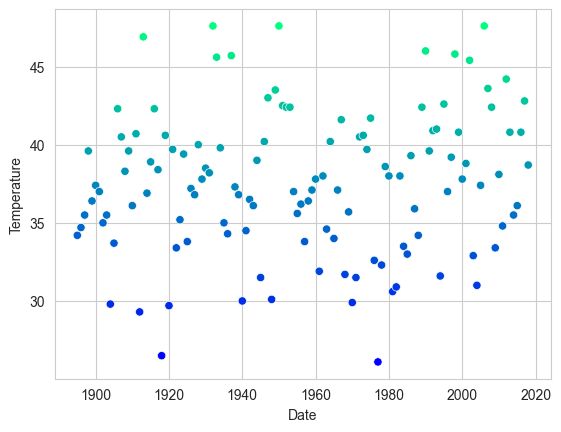

In [26]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

(10.0, 70.0)

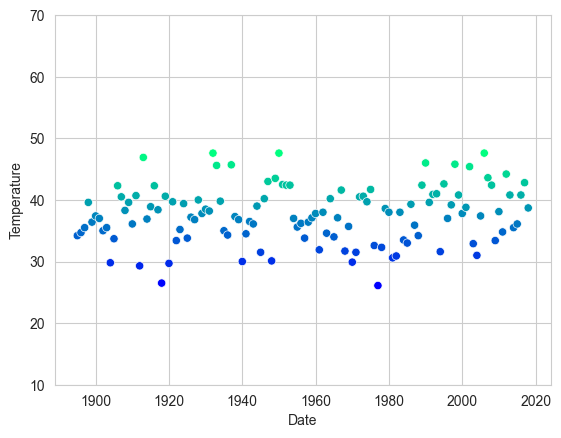

In [27]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)


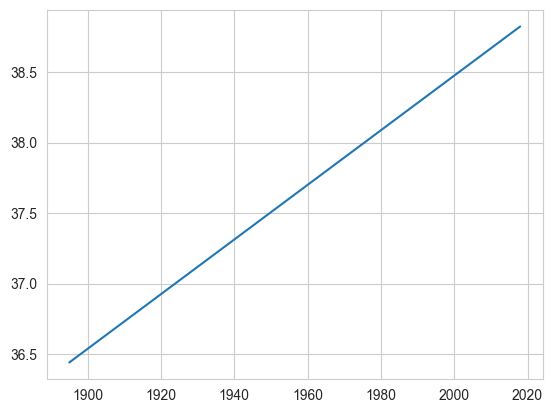

In [29]:
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)
line = plt.plot(x,y)

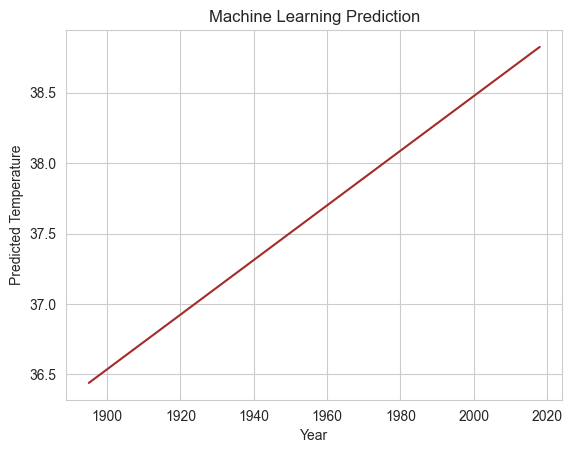

In [30]:
# Assuming 'x' contains the date range and 'y' is the predicted temperature
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

line = plt.plot(x, y, color='brown')  # Set the line color to brown

plt.xlabel('Year')                   # X-axis label
plt.ylabel('Predicted Temperature')   # Y-axis label
plt.title('Machine Learning Prediction')  # Title of the plot

# Display the plot
plt.show()

The temperature rose by approximately 2 degrees Fahrenheit.

### Part 4 - Add Insights

Using Machine learning via scikit allows us to easily perform model fitting, validation, and handling larger datasets more. Additionally, scikit-learn offers tools for splitting data into training and test sets, improving the assessment of model performance.

Basic Linear Regression is simpler, but has existed longer and is better understood. 

The Machine Learning model predicted a temp around 0.3 degrees higher than the linear regression.